# Classification

### Importing the Necessary Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.classification import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [17]:
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Exploratory Data Analysis

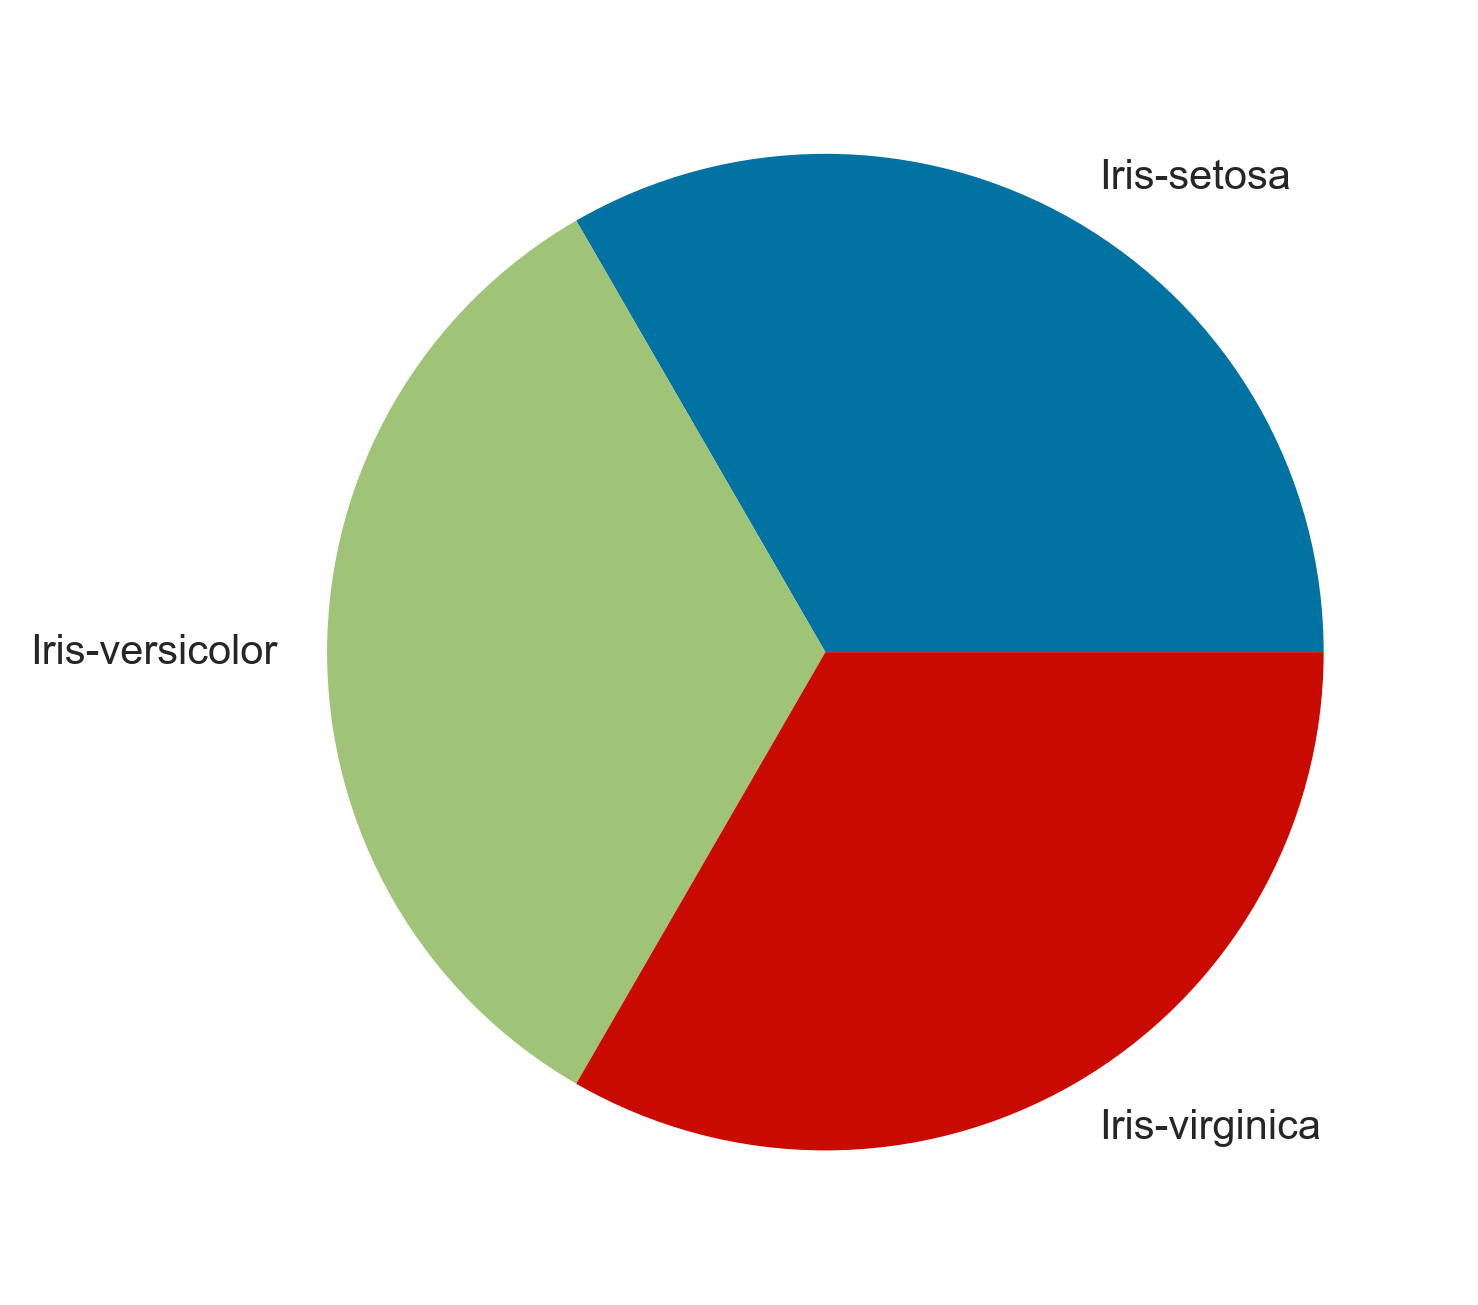

In [19]:
data['species'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

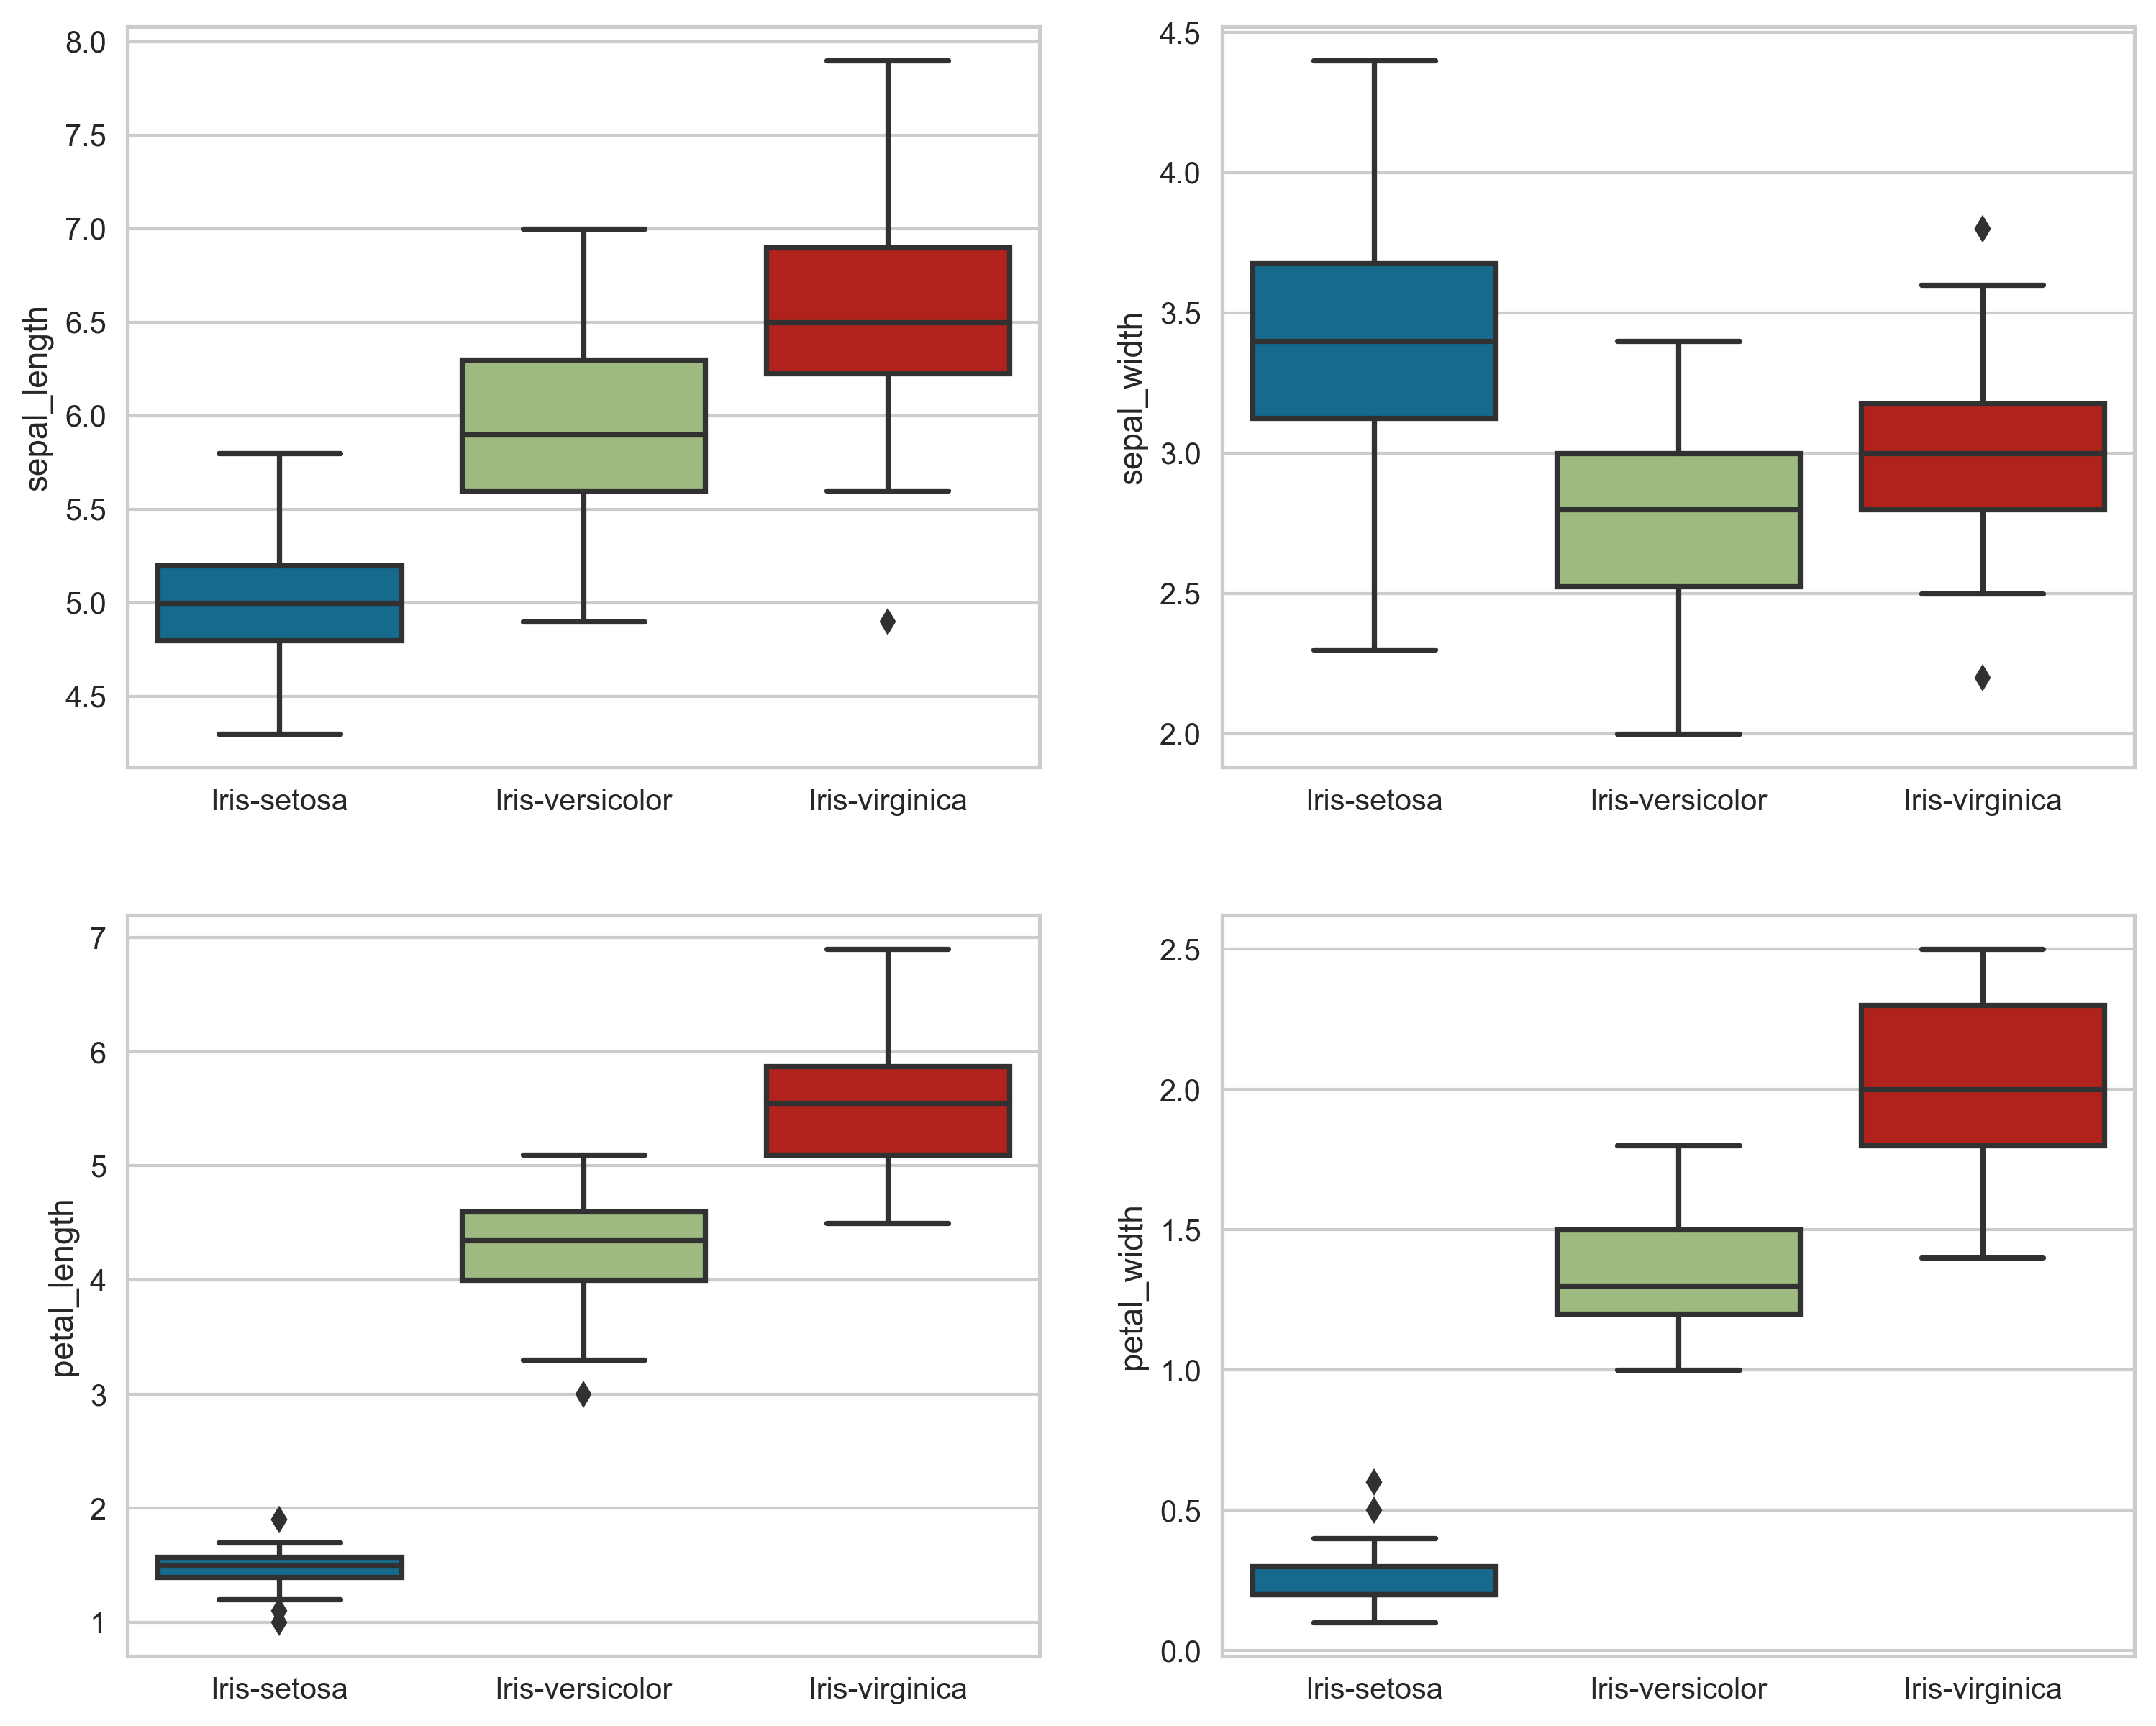

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))

for ax, col in zip(axes.flatten(), data.columns) :
    sns.boxplot(data = data, x = 'species', y = col, ax = ax)
    ax.set_xlabel('')

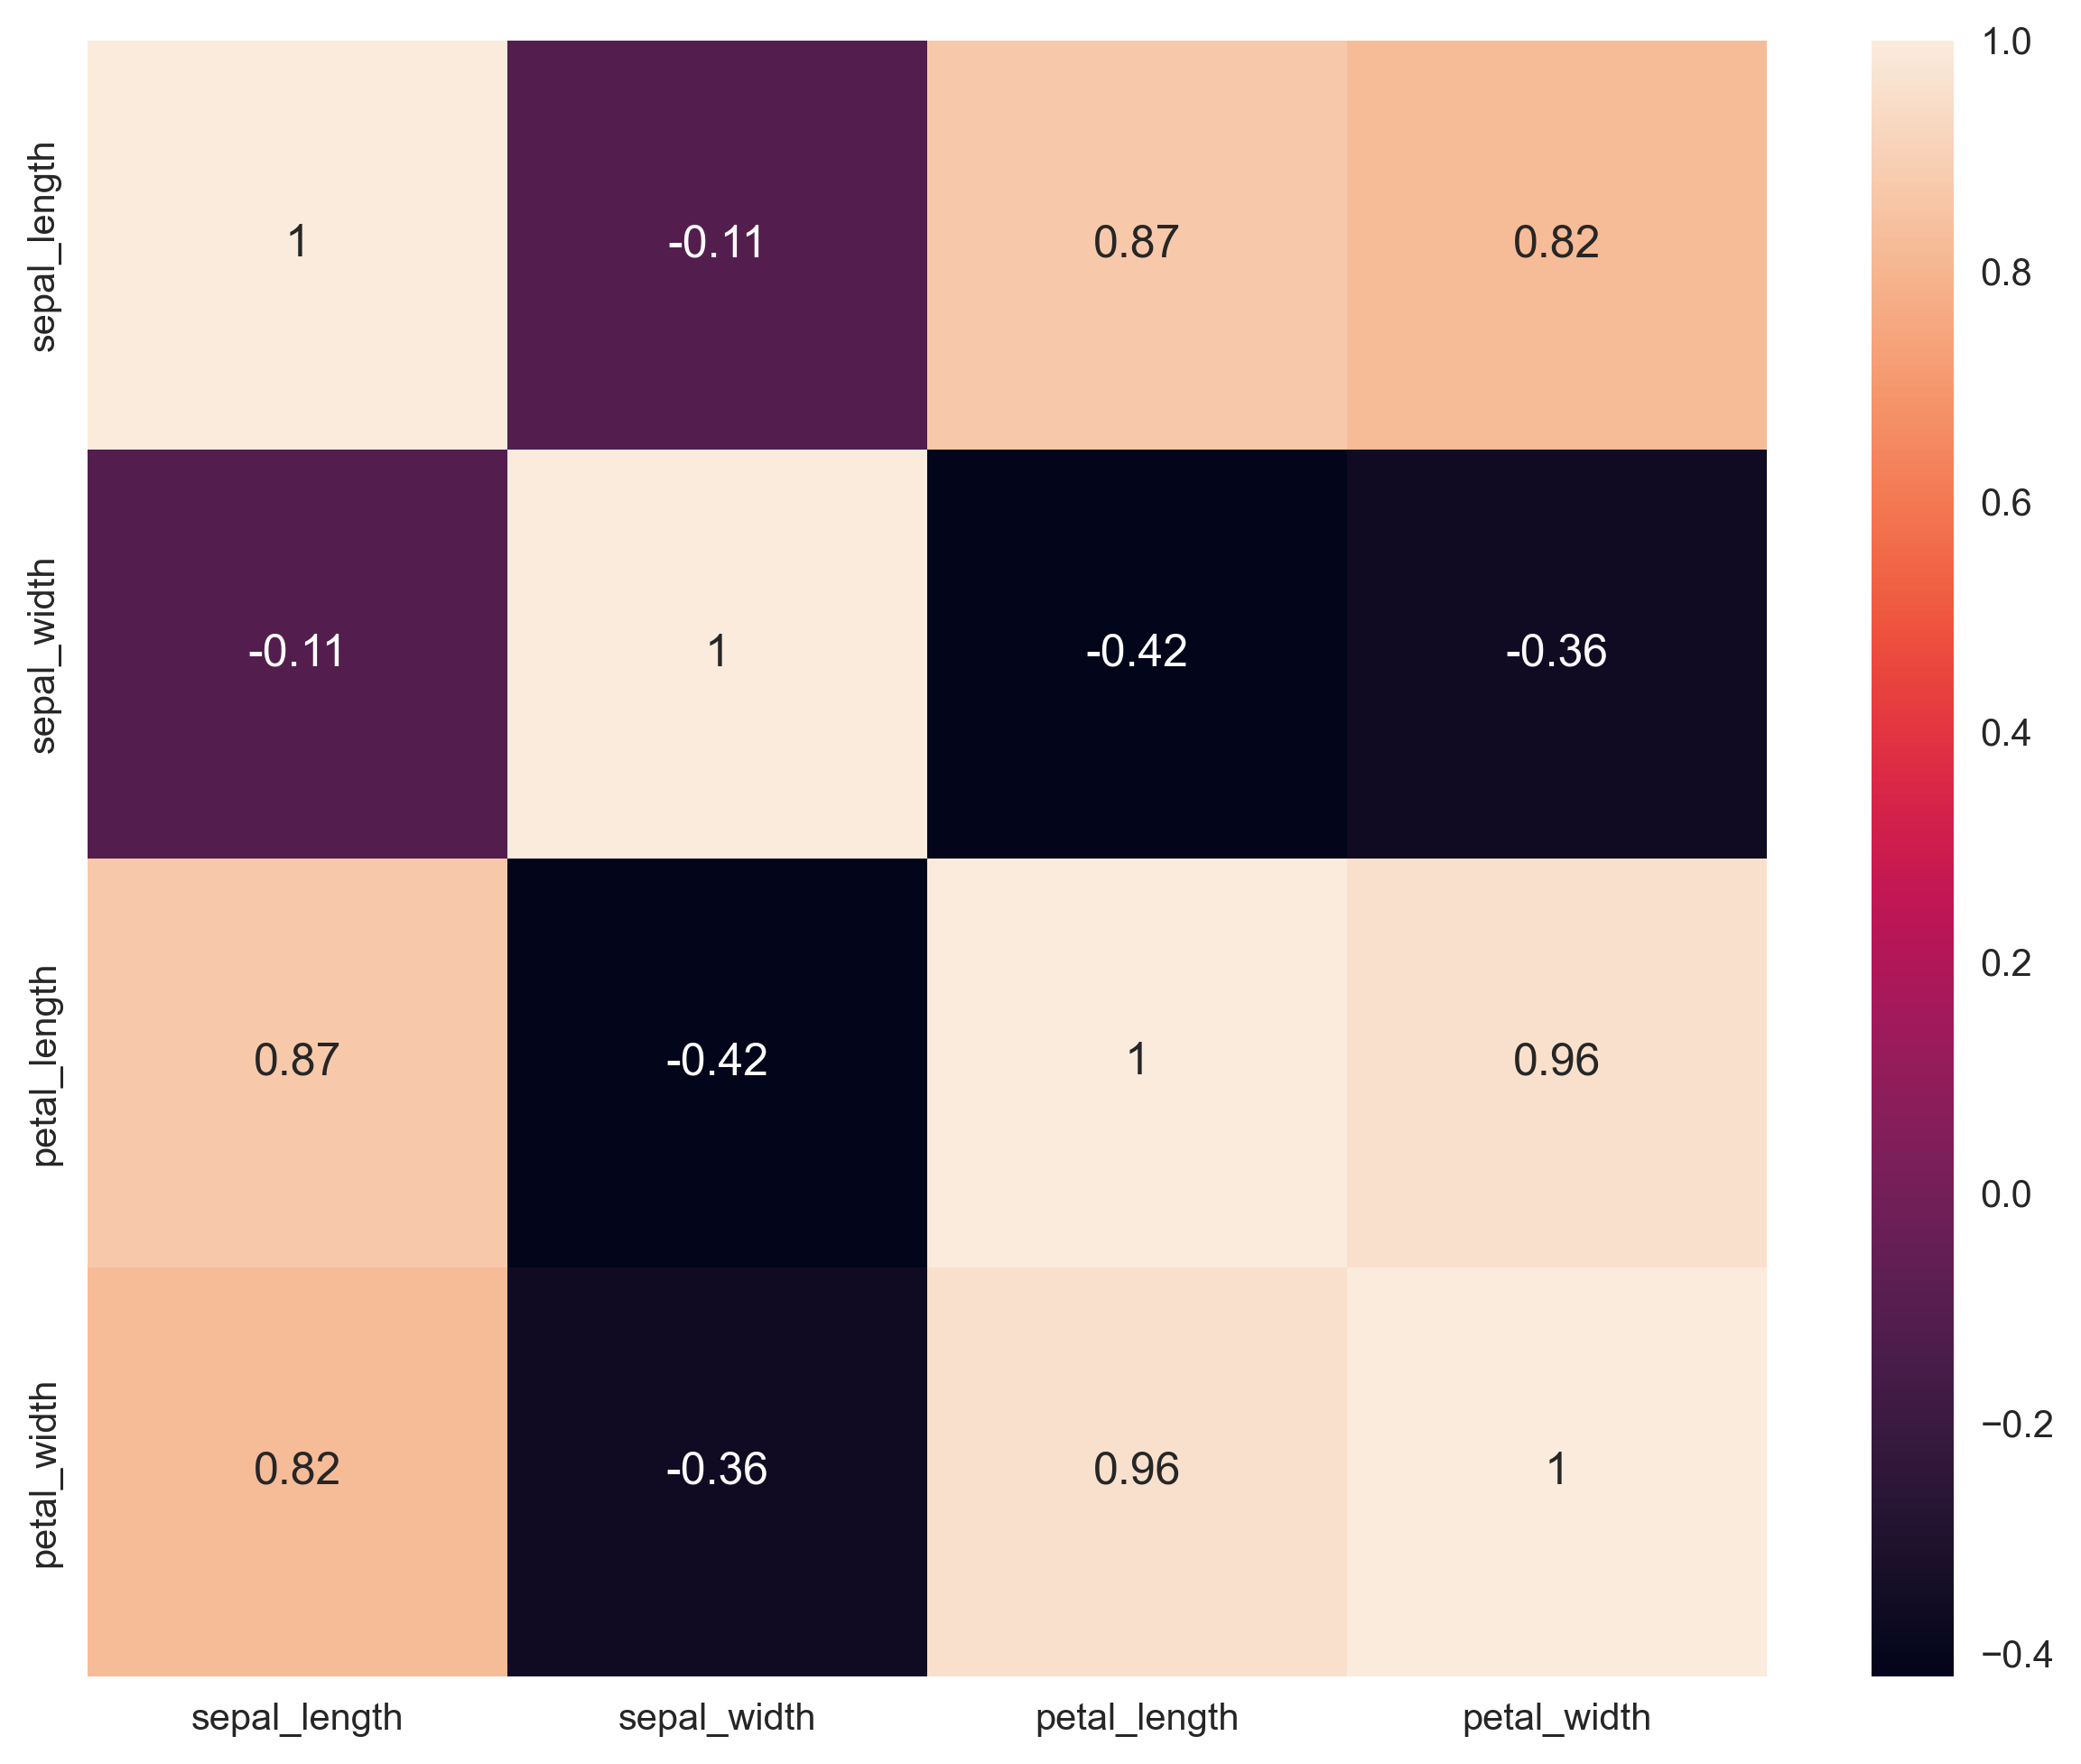

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()

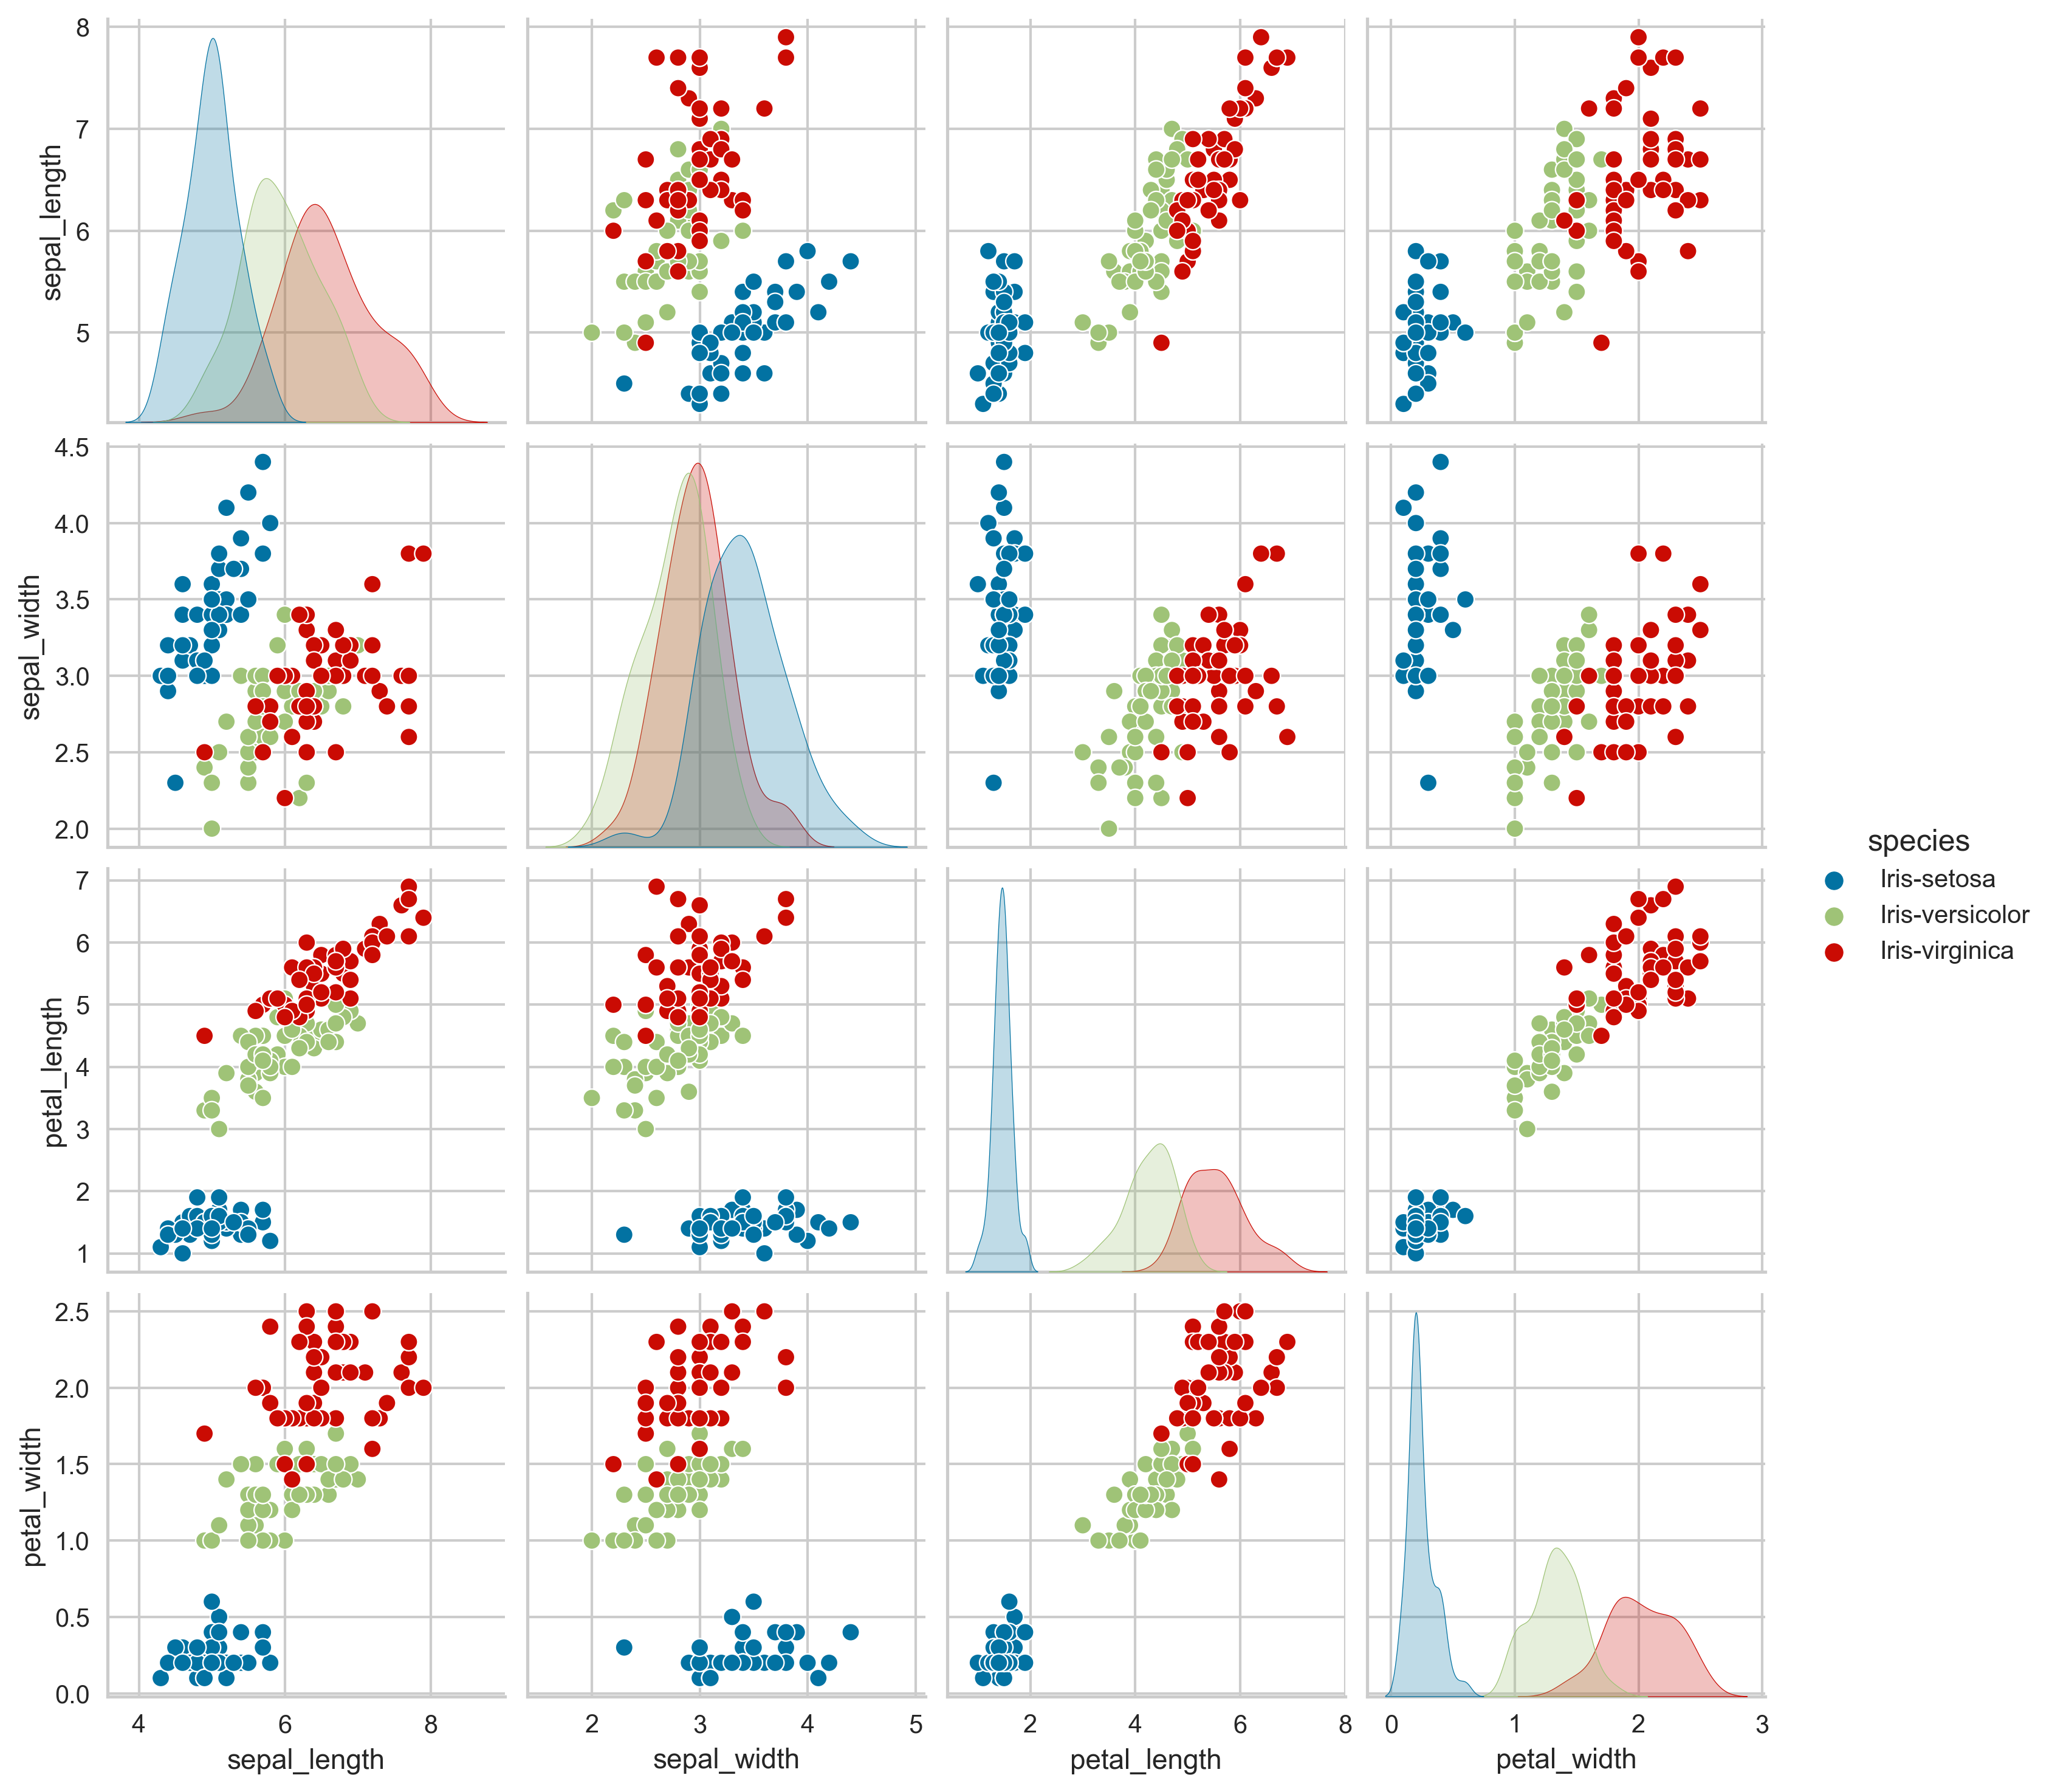

In [22]:
sns.pairplot(data, hue='species')
plt.show()

### Initializing the PyCaret Environment

In [23]:
classf = setup(data = data, target = 'species', train_size = 0.8,
               normalize = True, session_id = 3934)

,Description,Value
0,session_id,3934
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original Data,"(150, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### Comparing Classification Models

In [24]:
compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9833,1.0000,0.9833,0.9867,0.9831,0.9750,0.9769,0.0040
qda,Quadratic Discriminant Analysis,0.9750,1.0000,0.9750,0.9800,0.9746,0.9625,0.9653,0.0050
lr,Logistic Regression,0.9583,1.0000,0.9617,0.9697,0.9574,0.9375,0.9436,0.4220
knn,K Neighbors Classifier,0.9583,0.9932,0.9600,0.9671,0.9579,0.9375,0.9421,0.2900
nb,Naive Bayes,0.9583,0.9979,0.9617,0.9697,0.9574,0.9375,0.9436,0.0040
et,Extra Trees Classifier,0.9583,1.0000,0.9600,0.9693,0.9571,0.9375,0.9436,0.0890
xgboost,Extreme Gradient Boosting,0.9417,0.9855,0.9467,0.9564,0.9406,0.9124,0.9203,0.1010
lightgbm,Light Gradient Boosting Machine,0.9417,0.9885,0.9450,0.9560,0.9403,0.9124,0.9203,0.0230
catboost,CatBoost Classifier,0.9417,0.9990,0.9467,0.9564,0.9406,0.9124,0.9203,0.3050
rf,Random Forest Classifier,0.9333,0.9938,0.9400,0.9526,0.9321,0.9004,0.9106,0.1000


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

### Creating the Model

In [44]:
model = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Tuning the Model

In [26]:
model_cat = create_model('catboost', verbose = False)

params = {'iterations': np.arange(100, 1000, 100),
         'max_depth': np.arange(1, 10),
         'learning_rate': np.arange(0.01, 1, 0.01),  
         'random_strength': np.arange(0.1, 1.0, 0.1),
         'l2_leaf_reg': np.arange(1, 100),
         'border_count': np.arange(1, 256)}

tuned_model = tune_model(model_cat, optimize = 'Accuracy', fold = 10,
            tuner_verbose = False, search_library = 'scikit-optimize',
            custom_grid = params, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8333,1.0000,0.8333,0.8889,0.8222,0.7500,0.7833
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9167,1.0000,0.9333,0.9375,0.9180,0.8750,0.8843
9,0.9167,0.9907,0.9333,0.9375,0.9180,0.8750,0.8843


### Making Predictions

In [48]:
predictions = predict_model(model)

predictions.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9667,1.0000,0.9524,0.9692,0.9661,0.9484,0.9501


,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,-0.085637,2.256249,-1.480436,-1.354654,Iris-setosa,Iris-setosa,1.000
1,1.198925,0.114993,0.883009,1.120194,Iris-virginica,Iris-virginica,0.999
2,-0.319194,-1.312511,0.038922,-0.182357,Iris-versicolor,Iris-versicolor,1.000
3,0.615033,0.352911,0.826737,1.380705,Iris-virginica,Iris-virginica,1.000
4,-0.435973,2.732084,-1.367891,-1.354654,Iris-setosa,Iris-setosa,1.000
5,-1.136643,-0.122924,-1.367891,-1.354654,Iris-setosa,Iris-setosa,1.000
6,-0.786308,1.066663,-1.311618,-1.354654,Iris-setosa,Iris-setosa,1.000
7,-0.903086,1.780415,-1.255346,-1.354654,Iris-setosa,Iris-setosa,1.000
8,-0.085637,-1.074594,0.095194,-0.052102,Iris-versicolor,Iris-versicolor,1.000
9,-0.903086,1.542498,-1.311618,-1.094143,Iris-setosa,Iris-setosa,1.000


### Plotting the Model

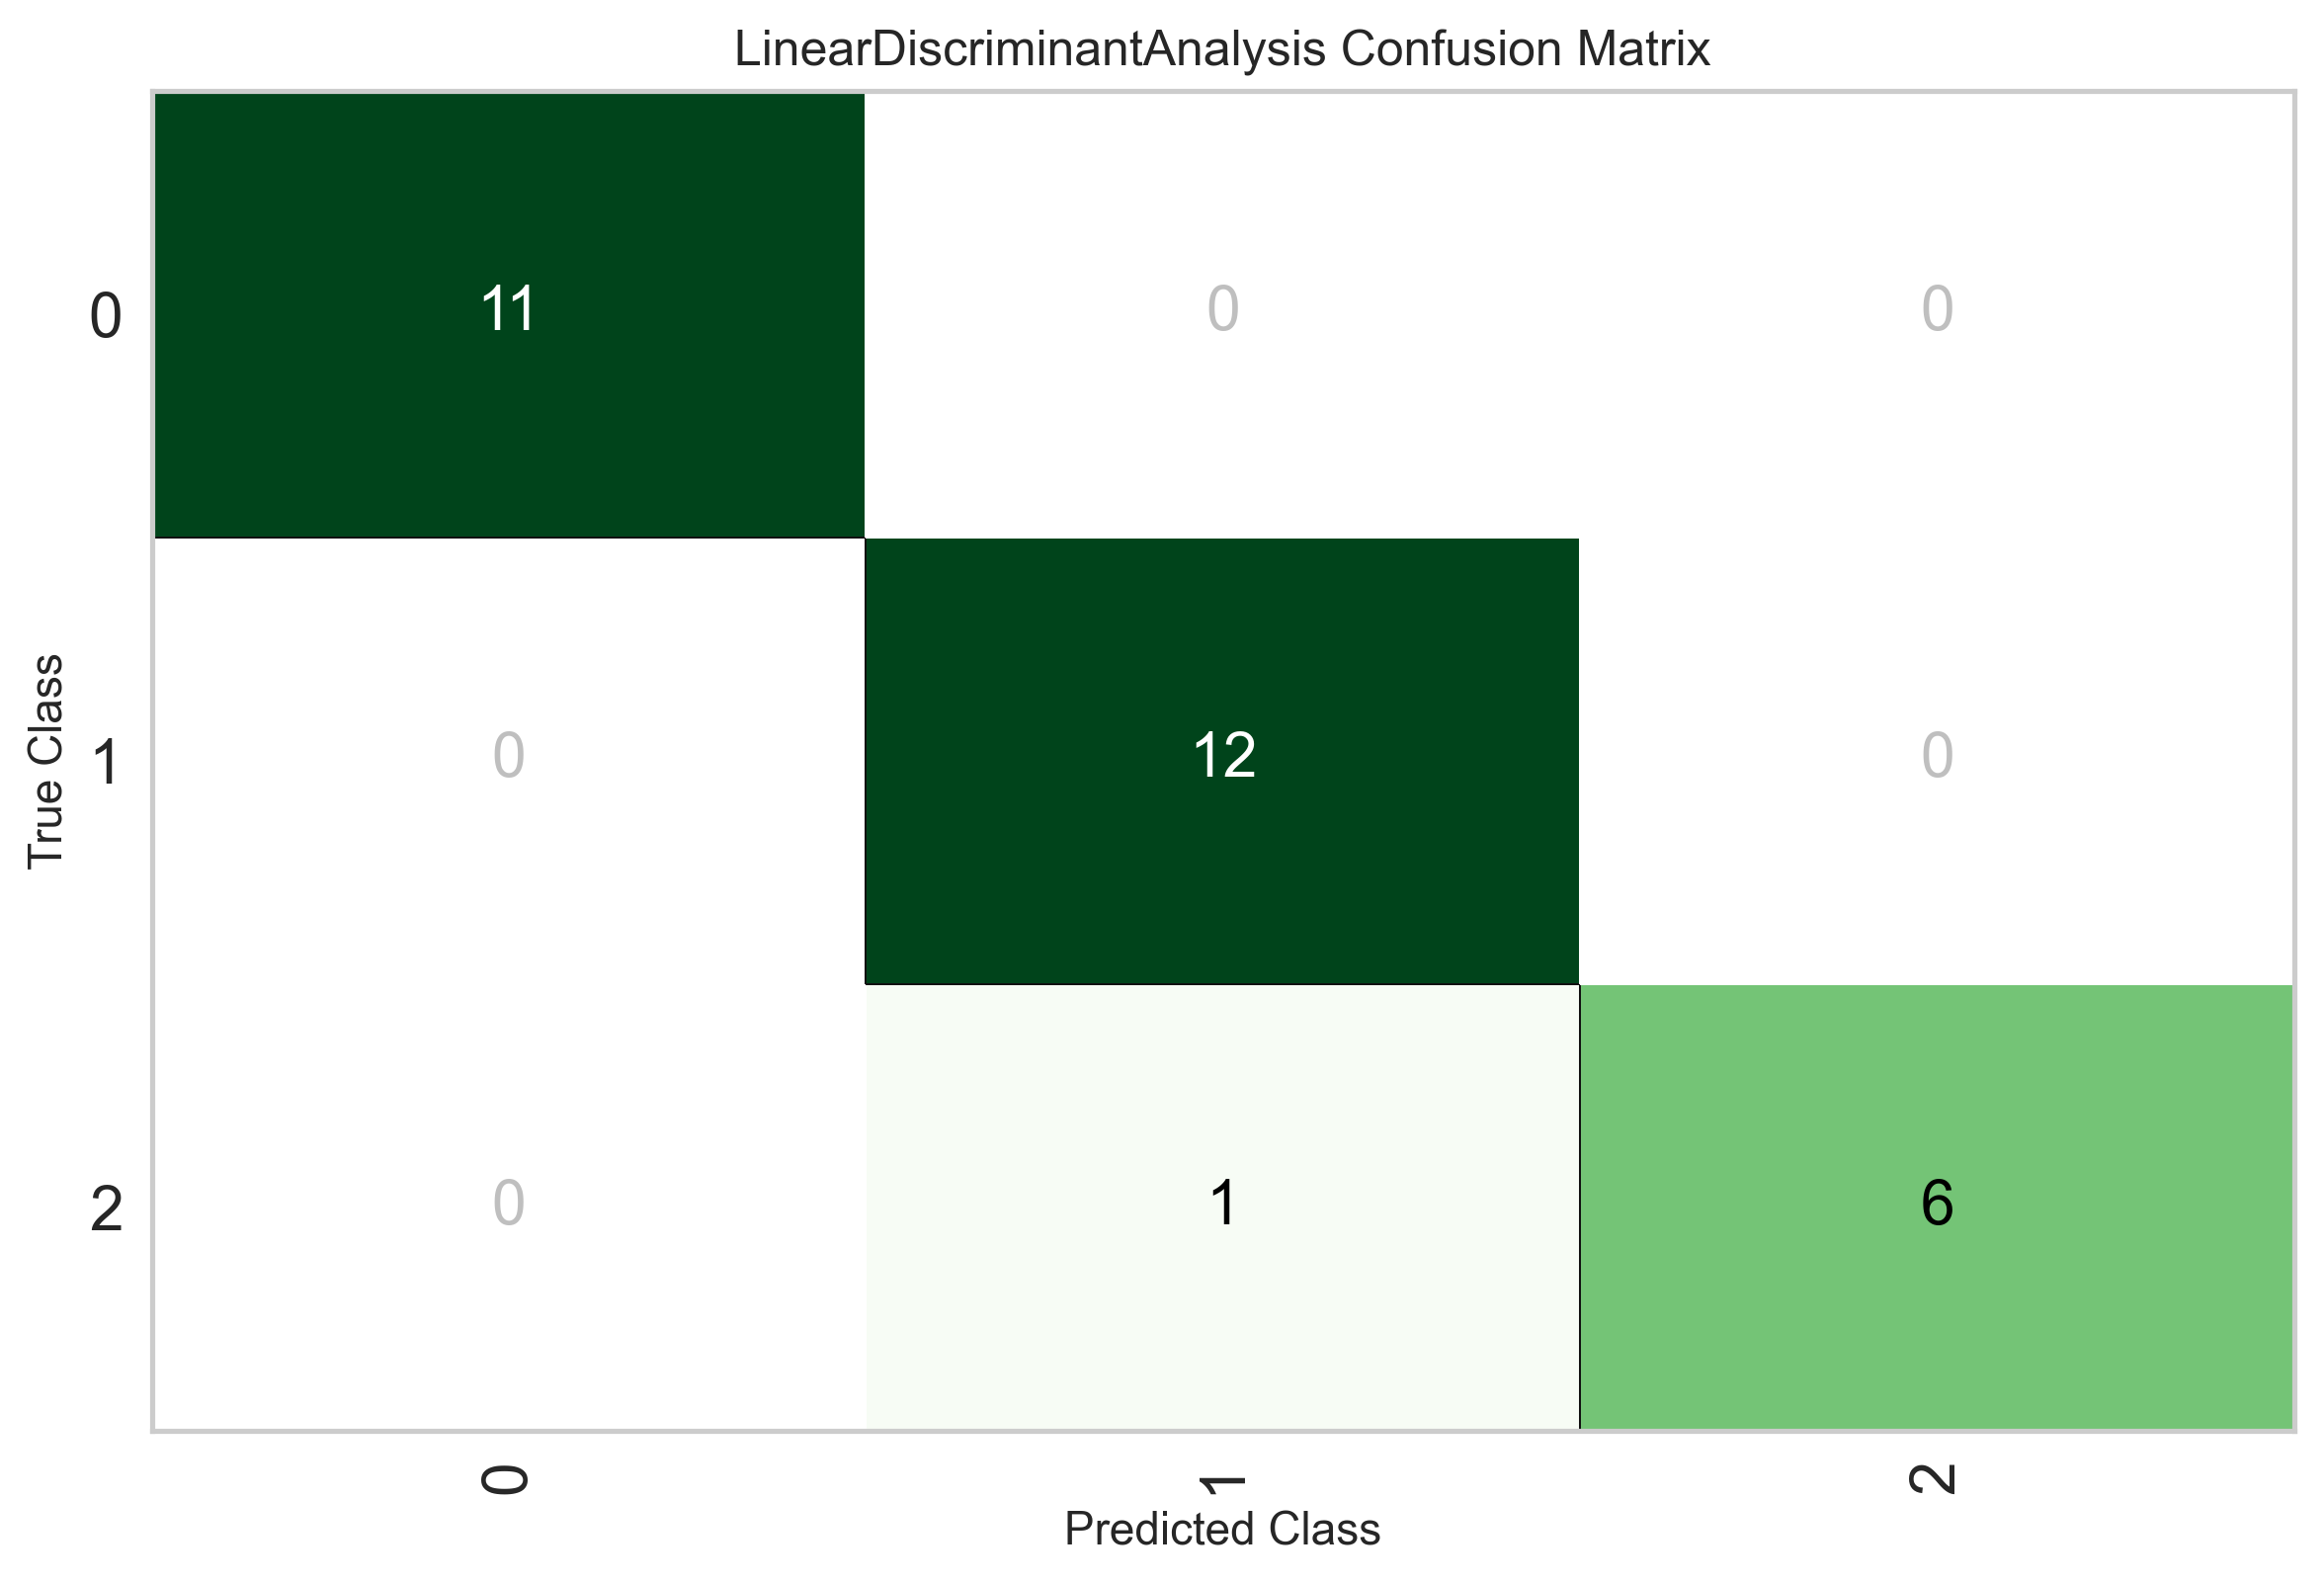

In [49]:
plot_model(model, 'confusion_matrix')

### Finalizing and Saving the Model

In [50]:
final_model = finalize_model(model)

save_model(final_model, 'classification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dummy', Dummify(target='species')),
                 ('fix_perfect', Remove_100(target='species')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 (